##*Real Time Age Prediction Using Pretrained ResNet50*
By Nakshatra Singh

This notebook will show you how to use pretrained resnet50 for *Real Time Age Prediction*.

##Using Google GPU for Training

Google colab offers free GPUs and TPUs! Since we'll be training a large model it's best to take advantage of this (in this case we'll use GPU), otherwise training can take long time.

A GPU can be added by going to the menu and selecting:

`Edit -> Notebook Settings -> Hardware Accelerator -> (GPU)`

Then run the following cell to confirm that a GPU is detected. 

In [1]:
import tensorflow as tf
# Get the device GPU name 
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
  print('Found GPU at : {}'.format(device_name)) 
else:
  raise SystemError('GPU not found!')

Found GPU at : /device:GPU:0


###**1. ResNet50**

ResNet is one of the most powerful deep neural networks which has achieved fantabulous performance results in the ILSVRC 2015 classification challenge. ResNet has achieved excellent generalization performance on other recognition tasks and won the first place on ImageNet detection, ImageNet localization, COCO detection and COCO segmentation in ILSVRC and COCO 2015 competitions. There are many variants of ResNet architecture i.e. same concept but with a different number of layers. We have ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-110, ResNet-152, ResNet-164, ResNet-1202 etc. The name ResNet followed by a two or more digit number simply implies the ResNet architecture with a certain number of neural network layers.

<img src="https://miro.medium.com/max/858/1*aq0q7gCvuNUqnMHh4cpnIw.png" height= "320" width= "635">

###**2. Retrieve and Inspect Dataset**

Let's download the dataset which is uploaded on my [{Github Repository}](https://github.com/nakshatrasinghh/Image-Dataset-for-Age-Prediction).

In [ ]:
!git clone https://github.com/nakshatrasinghh/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 23797, done.
remote: Total 23797 (delta 0), reused 0 (delta 0), pack-reused 23797
Receiving objects: 100% (23797/23797), 1.27 GiB | 41.69 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (24109/24109), done.


###**3. Ktrain**

ktrain is a lightweight wrapper for the deep learning library TensorFlow Keras (and other libraries) to help build, train, and deploy neural networks and other machine learning models. Inspired by ML framework extensions like fastai and ludwig, it is designed to make deep learning and AI more accessible and easier to apply for both newcomers and experienced practitioners. With only a few lines of code, ktrain allows you to easily and quickly.

Next, let's install the *`Ktrain`* library from this [Github Repository](https://github.com/amaiya/ktrain).

In [ ]:
!pip install ktrain 

     |████████████████████████████████| 25.3MB 129kB/s 
     |████████████████████████████████| 983kB 48.5MB/s 
     |████████████████████████████████| 245kB 45.9MB/s 
     |████████████████████████████████| 890kB 49.9MB/s 
     |████████████████████████████████| 471kB 41.6MB/s 
     |████████████████████████████████| 1.1MB 40.1MB/s 
     |████████████████████████████████| 890kB 50.3MB/s 
     |████████████████████████████████| 3.0MB 51.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.3-cp36-none-any.whl size=25270203 sha256=89ee19522361fbe417b44c8a704f4fe6bf140b5a1d63febf86688c05cf9df70f
  Stored in directory: /root/.cache/pip/wheels/d6/ef/6d/9428365b27ac1e84a77214c5718e7f8b2180007af593791247
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=e5258aa3a691a68925fb89f13eaff30f7ffab4302c06f8a60da1041b05ff25ef
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

Now, let's do some basic imports for this notebook. 

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

We'll be using `Regular Expression` to parse through the filename.

In [ ]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$' # Excludes everything after the bracket, d represents digits

p = re.compile(pattern)
r = p.search('100_0_0_20170112213500903.jpg') # Example filename from the dataset.
print(r.group(1))

100


Let's define our path for the working dataset directory.

In [ ]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/Images'

`images_from_fname` is a function in vision package which renders all the images from a filename. We'll pass our complete working directory here and all the heavy-lifting will be done by the function. This function always returns 3 variables (including 2 tuples).

Note: Default train-test split is 10% unless specified.

###**4. Model Building and Training with Ktrain**

In [ ]:
(train_data), (test_data), preproc = vis.images_from_fname(DATADIR,
                      pattern=pattern,
                      is_regression=True,
                      random_state=42)

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/Images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/Images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/Images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-

Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:664: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:565: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'If this is incorrect, change accordingly.')


The filenames which were incorrectly encoded are just ignored and not taken in training.

Let's see what all models are ready for us to use.

In [ ]:
vis.print_image_regression_models() 

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


We'll be using `pretrained_resnet50`.

In [ ]:
model = vis.image_regression_model('pretrained_resnet50',
                                   train_data = train_data,
                                   val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


We'll define our learner which is used in training the model and getting predictions.

In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = train_data,
                             val_data = test_data,
                             batch_size=64)

Now, we'll fit the learner with onecycle policy having parameters - learning rate=0.00001, epochs=2. You can change these hyperparameters which can change performance, I would recommend not to lower the learning rate, it will reduce your accuracy and if you want you can run it for more epochs.

In [ ]:
learner.fit_onecycle(1e-5, 2)   # Training on all 50 layers. 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
339/339 [==============================] - 363s 1s/step - loss: 923.9599 - mae: 24.1285 - val_loss: 440.4344 - val_mae: 15.8978
Epoch 2/2
339/339 [==============================] - 350s 1s/step - loss: 362.7765 - mae: 14.5246 - val_loss: 347.7791 - val_mae: 14.1301


Let's freeze the first 15 layers of the model and train it again using the last 35 layers.

In [ ]:
learner.freeze(15)               # Freezing first 15 layers of ResNet50.

learner.fit_onecycle(1e-5, 2)    # Training last 35 layers again.



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
339/339 [==============================] - 420s 1s/step - loss: 172.3675 - mae: 10.3238 - val_loss: 112.2607 - val_mae: 7.7747
Epoch 2/2
339/339 [==============================] - 424s 1s/step - loss: 80.4011 - mae: 6.8333 - val_loss: 89.6877 - val_mae: 7.0222


Let's get our predictor using `get_predictor`.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

Let's take a random sample from the test set, just to see how are model works.

In [ ]:
test_data.filenames[10] 

'88_1_0_20170120230330380.jpg'

I'll write a helper function which will help us in visualizing the result a little better.

In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted Age: %s || Actual Age: %s" %   (pred, actual))

Let's run the function on the sample image present in our test set.

Predicted Age: 87.0 || Actual Age: 88


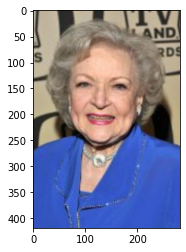

In [ ]:
show_prediction('88_1_0_20170120230330380.jpg')

WooHoo! The model works brilliantly and is predicting the age quite accurately.  

###**5. Real-Time Age Prediction**

This a google code snippet which I found in the code snippet section on the right, you can get this code by just typing `Camera Capture`.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Run this cell to take a picture using your camera and it saves the image as `photo.jpg`. Click on the *capture* button to take the photo and continue running the other cells.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Now, let's write a helper function which will input the image you captured and show real-time prediction using the `predictor` we defined earlier.

In [ ]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print("Predicted Age: %s" % (pred)) 

Calling the helper function on the captured image.

In [ ]:
real_prediction('photo.jpg')

There you go! I hope the results were accurate, if they weren't then it could be because of *hues of light and the position in your image*, but I did notice the model is slightlynot accurate for younger ages, we can surely increase the epochs to enhance model performance.

###**6. Model Saving**


Let's save the model in a folder called `Age_Prediction_Model`.

In [ ]:
predictor.save('/content/Age_Prediction_Model')

Since it contains a preproc model and the final tensorflow model (.h5), we'll zip the files in another folder so we can download them directly from colab. 

In [ ]:
!zip -r /content/Age_Prediction_Model_zip.zip /content/Age_Prediction_Model

  adding: content/Age_Prediction_Model/ (stored 0%)
  adding: content/Age_Prediction_Model/tf_model.h5 (deflated 9%)
  adding: content/Age_Prediction_Model/tf_model.preproc (deflated 41%)


###**Summary**

This notebook illustrated how to use a pretrained resnet model for predicting age in real-time. You can definitely change the hyperparameters to achieve better results. The model suffers in predicting ages of younger people, this could be due to many reasons: 

- Less data for young ages
- Hues of light falling on the face
- Positioning of the object

Special thanks to [amaiya](https://github.com/amaiya) for giving this huge contribution, this library has helped me build complex models with just few lines of code. Please check out the [repo](https://github.com/amaiya/ktrain) for more details.